# Checking and cleaning the data

Import necessary libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

Read the data

In [3]:
data= pd.read_csv("AirPassengers.csv")

Check the data

In [4]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


Convert the data

In [7]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month',inplace= True)

In [8]:
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [10]:
decomp = seasonal_decompose(data, model="multiplicative")

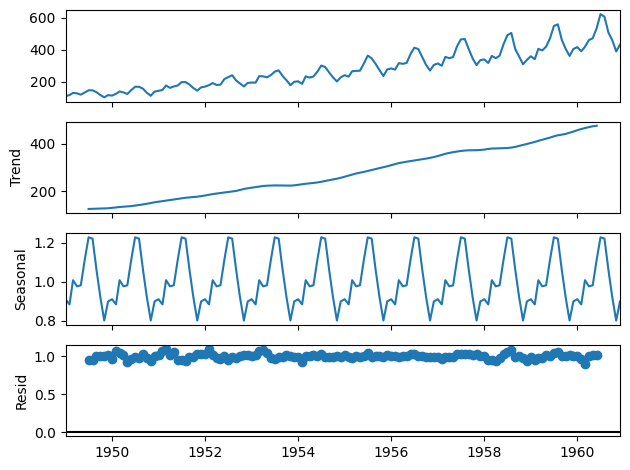

In [11]:
decomp.plot();

In [12]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [13]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Plotting the data

In [14]:
ts = data['Passengers'] # we only need the passengers data as we have set the month as the index of our data therefore it is not needed to call the whole data

In [15]:
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

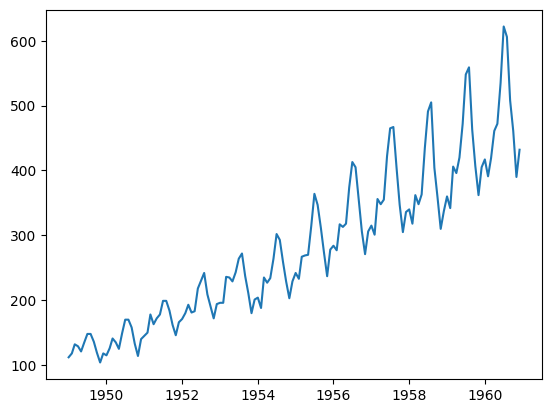

In [16]:
plt.plot(ts); #Plotting the data

# Do the Stationarity Test (ADF or KPSS)

### Note that: In this code, I will use the ADF test

In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
#H0 : The data is non-stationarity
#H1: The data is stationarity
# Remember that when you do plotting in the pandas Series,there should only be 1 column. So we need to squeeze it. If there is only one column, you do not need to squeeze the data
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    # Calculate the mean with window = 12
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    # Calculate the standard deviation with window = 12

    # Plot the result
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean,color='red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black',label ='Rolling Std')
    plt.legend(loc='best')
    plt.title("Rolling Mean & Std")
    plt.show(block=False);

    # Perform the Dicky-Fuller test
    # The dicky fuller test is used to test the stationarity of the data
    print("Result of the test:")
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index= ['Test Statistic','p-value','Number of lag used','Number of observations'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value 
    print(dfoutput)

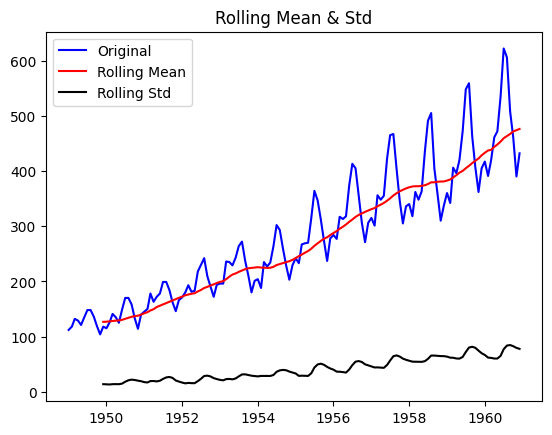

Result of the test:
Test Statistic              0.815369
p-value                     0.991880
Number of lag used         13.000000
Number of observations    130.000000
Critical Value (1%)        -3.481682
Critical Value (5%)        -2.884042
Critical Value (10%)       -2.578770
dtype: float64


In [18]:
test_stationarity(ts)

We see that the data in this case has high p-value, which means that the data is highy not stationary

# Transforming the data:
- Log transform
- Differencing
- Double log
- Double differencing
- Log + differencing

After any transformation, you need to do the inverse transform

In [19]:
ts_log = np.log(ts)

In [20]:
ts_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: Passengers, dtype: float64

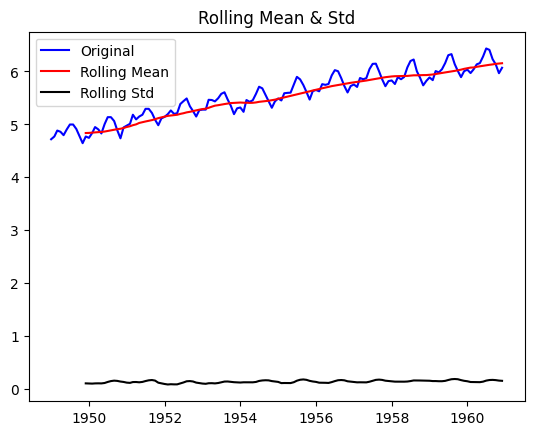

Result of the test:
Test Statistic             -1.717017
p-value                     0.422367
Number of lag used         13.000000
Number of observations    130.000000
Critical Value (1%)        -3.481682
Critical Value (5%)        -2.884042
Critical Value (10%)       -2.578770
dtype: float64


In [21]:
test_stationarity(ts_log)

The p-value is still too high for us to use it for the forecasting.

In [22]:
ts_double_log = np.log(ts_log)

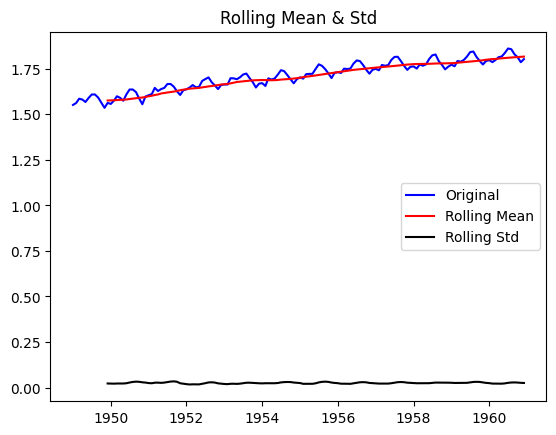

Result of the test:
Test Statistic             -2.156028
p-value                     0.222590
Number of lag used         13.000000
Number of observations    130.000000
Critical Value (1%)        -3.481682
Critical Value (5%)        -2.884042
Critical Value (10%)       -2.578770
dtype: float64


In [23]:
test_stationarity(ts_double_log)

p_value has decreased but still not good enough

In [24]:
#Smoothing transform


In [25]:
moving_avg = pd.Series(ts_log).rolling(window=12).mean()
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace= True)

In [26]:
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: Passengers, dtype: float64

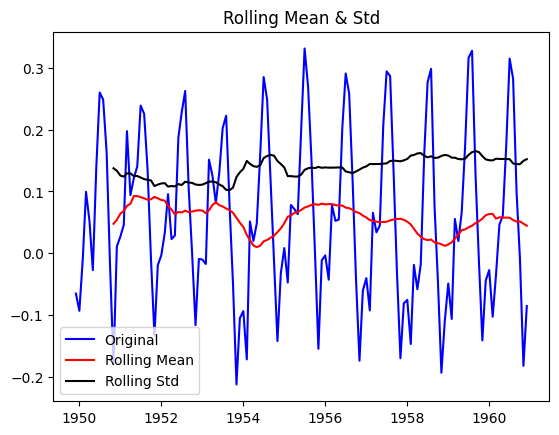

Result of the test:
Test Statistic             -3.162908
p-value                     0.022235
Number of lag used         13.000000
Number of observations    119.000000
Critical Value (1%)        -3.486535
Critical Value (5%)        -2.886151
Critical Value (10%)       -2.579896
dtype: float64


In [27]:
test_stationarity(ts_log_moving_avg_diff)

the p-value is pretty small, which we can use now for the prediction

In [28]:
ts_log_diff = ts_log - ts_log.shift() # Which is shifted by 1

In [29]:
ts_log_diff.dropna(inplace=True)

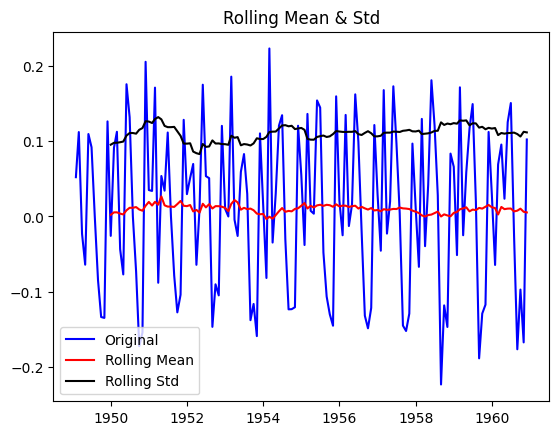

Result of the test:
Test Statistic             -2.717131
p-value                     0.071121
Number of lag used         14.000000
Number of observations    128.000000
Critical Value (1%)        -3.482501
Critical Value (5%)        -2.884398
Critical Value (10%)       -2.578960
dtype: float64


In [30]:
test_stationarity(ts_log_diff)

In [31]:
# decompose the transform data
result_1 = seasonal_decompose(ts_log)

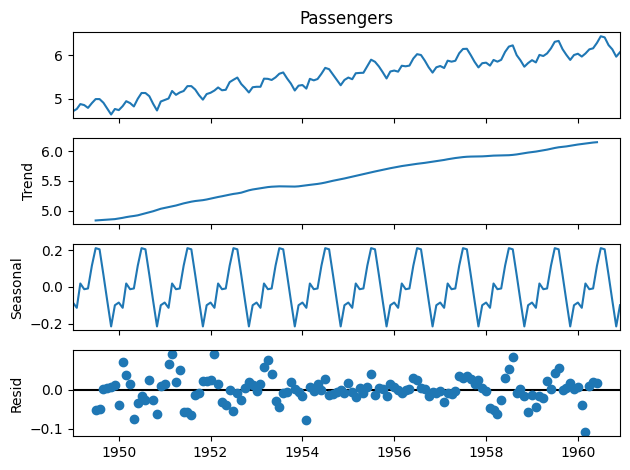

In [32]:
result_1.plot();

Some inverse transformation

In [33]:
# # Inverse transform of log transform 
# ts_orig = np.exp(ts_log)

# Inverse transform of log differencing
# ts_log_diff = ts_log - ts_log.shift()
# -> (Add the shifted lag values to the first log value to get the cumulative sum)
# ts_log_cumsum = ts_log_diff.cumsum()
# ts_log_restored = ts_log.iloc[0] + ts_log_cumsum
# ts_orig = np.exp(ts_log_restored)

#Inverse transform of log with moving avg and diff
# moving_avg = pd.Series(ts_log).rolling(window=12).mean()
# ts_log_moving_avg_diff = ts_log - moving_avg
# ts_log_moving_avg = ts_log_moving_avg_diff + moving_avg
# ts_orig = np.exp(ts_log_moving_avg)


We will choose the log transformation for experimenting this time as it is easy for inverse transformation and easier for coding at the first time

In [34]:
ts_values = ts_log.values
X = ts_values
size = int(len(X)*0.667)
train, test = X[0:size], X[size:len(X)]

In [35]:
len(train)

96

In [36]:
len(test)

48

In [37]:
len(X)

144

# Model Buiding

In [40]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings("ignore")
import math


In [ ]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    try:
        model = ARIMA(history,order=(4,1,2))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    except(ValueError, LinAlgError):
        pass
    print('predicted = %f, expected = %f' %(yhat,obs))

error = mean_squared_error(test,predictions)
rmse = math.sqrt(error)
print("MSE result:",round(rmse,3))

predicted = 5.773746, expected = 5.752573
predicted = 5.722682, expected = 5.707110
predicted = 5.731400, expected = 5.874931
predicted = 5.885769, expected = 5.852202
predicted = 5.816196, expected = 5.872118
predicted = 5.924765, expected = 6.045005
predicted = 6.023596, expected = 6.142037
predicted = 6.161449, expected = 6.146329
predicted = 6.172119, expected = 6.001415
predicted = 5.897346, expected = 5.849325
predicted = 5.816698, expected = 5.720312
predicted = 5.774583, expected = 5.817111
predicted = 5.863006, expected = 5.828946
predicted = 5.792884, expected = 5.762051
predicted = 5.795414, expected = 5.891644
predicted = 5.919768, expected = 5.852202
predicted = 5.808388, expected = 5.894403
predicted = 5.932266, expected = 6.075346
predicted = 6.066287, expected = 6.196444
predicted = 6.193980, expected = 6.224558
predicted = 6.243441, expected = 6.001415
predicted = 5.889473, expected = 5.883322
predicted = 5.858097, expected = 5.736572
predicted = 5.699365, expected = 5

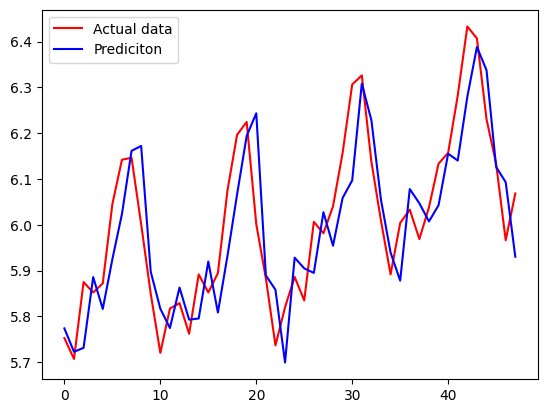

In [51]:
plt.plot(test,color='red',label='Actual data')
plt.plot(predictions, color = 'blue', label = 'Prediciton')
plt.legend()
plt.show();

However, this is not the final result, we need to transform it back to the actual prediction

In [52]:
final_pred = np.exp(predictions)
actual_result = np.exp(test)

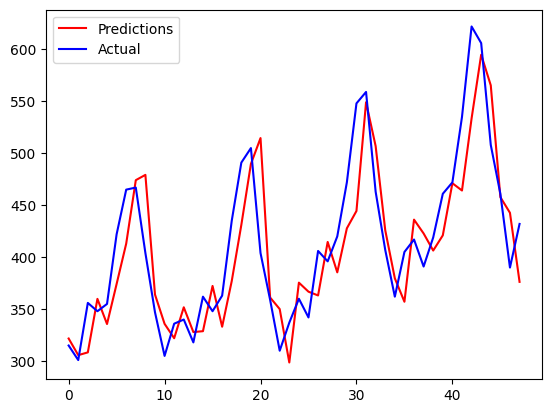

In [53]:
plt.plot(final_pred,color = 'red', label = 'Predictions')
plt.plot(actual_result,color = 'blue', label = 'Actual')
plt.legend()
plt.show();

We can also do the predictions that is outside the testing data.